Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Logistic Regression: Problem solving

In this session, you will predict whether or not a candy is popular based on its other properties.
This dataset [was collected](http://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) to discover the most popular Halloween candy.

| Variable         | Type              | Description                                                  |
|:-----------------|:------------------|:--------------------------------------------------------------|
| chocolate        | Numeric (binary)  | Does it contain chocolate?                                   |
| fruity           | Numeric (binary)  | Is it fruit flavored?                                        |
| caramel          | Numeric (binary)  | Is there caramel in the candy?                               |
| peanutalmondy    | Numeric (binary)  | Does it contain peanuts, peanut butter or almonds?           |
| nougat           | Numeric (binary)  | Does it contain nougat?                                      |
| crispedricewafer | Numeric (binary)  | Does it contain crisped rice, wafers, or a cookie component? |
| hard             | Numeric (binary)  | Is it a hard candy?                                          |
| bar              | Numeric (binary)  | Is it a candy bar?                                           |
| pluribus         | Numeric (binary)  | Is it one of many candies in a bag or box?                   |
| sugarpercent     | Numeric (0 to 1)  | The percentile of sugar it falls under within the data set.  |
| pricepercent     | Numeric (0 to 1)  | The unit price percentile compared to the rest of the set.   |
| winpercent       | Numeric (percent) | The overall win percentage according to 269,000 matchups     |
| popular | Numeric (binary) | 1 if win percentage is over 50% and 0 otherwise |

**Source:** This dataset is Copyright (c) 2014 ESPN Internet Ventures and distributed under an MIT license.

## Load the data

First import `pandas`.

In [2]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="lfN=$uzFcxs-6^)2j+oc">pd</variable></variables><block type="importAs" id="^+Nghe{{_uq{G7tc)sr/" x="130" y="233"><field name="libraryName">pandas</field><field name="VAR" id="lfN=$uzFcxs-6^)2j+oc">pd</field></block></xml>

Load a dataframe with `"datasets/candy-data.csv"` and display it.

In [4]:
dataframe = pd.read_csv('datasets/candy-data.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable><variable id="lfN=$uzFcxs-6^)2j+oc">pd</variable></variables><block type="variables_set" id="fF~/UXvqG^U(f~JGIDy`" x="2" y="136"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><value name="VALUE"><block type="varDoMethod" id="!;Ht!#J?fh-20leIrwzD"><mutation items="1"></mutation><field name="VAR" id="lfN=$uzFcxs-6^)2j+oc">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="l*avp11qT(YO1^[}vhMQ"><field name="TEXT">datasets/candy-data.csv</field></block></value></block></value></block><block type="variables_get" id="=3ZxG@3:Z(CS#Cl_5nv|" x="-3" y="227"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field></block></xml>

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,0
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,0
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,0
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0


Notice there is a bogus variable `competitorname` that is actually an ID, also known as an **index**. 
We saw the same thing in KNN regression with the `mpg` dataset, but that time it was the car name.

Load the dataframe again, but this time use `index_col="competitorname"` to fix this.

In [6]:
dataframe = pd.read_csv('datasets/candy-data.csv',index_col="competitorname")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable><variable id="lfN=$uzFcxs-6^)2j+oc">pd</variable></variables><block type="variables_set" id="fF~/UXvqG^U(f~JGIDy`" x="2" y="136"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><value name="VALUE"><block type="varDoMethod" id="!;Ht!#J?fh-20leIrwzD"><mutation items="2"></mutation><field name="VAR" id="lfN=$uzFcxs-6^)2j+oc">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="l*avp11qT(YO1^[}vhMQ"><field name="TEXT">datasets/candy-data.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="%a^tJB41wnm^9F~AcBGu"><field name="CODE">index_col="competitorname"</field></block></value></block></value></block><block type="variables_get" id="=3ZxG@3:Z(CS#Cl_5nv|" x="-3" y="227"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field></block></xml>

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,0
Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,0
WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,0


## Explore the data

### Descriptive statistics

Describe the data.

In [8]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="varDoMethod" id="a_9X+LWLGiJK*RB6qVf?" x="-25" y="188"><mutation items="1"></mutation><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764,0.458824
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357,0.501259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290,1.000000


Remember that for the 0/1 variables, the mean reflects the average presence of an ingredient in candy.
For example, `chocolate` is in 43.5% of candy.

**QUESTION:**

What is the least common ingredient (there may be more than one that is the same)?

**ANSWER: (click here to edit)**

*`nougat` and `crispedricewafer`*
<hr>

**QUESTION:**

What is the most common ingredient?

**ANSWER: (click here to edit)**

Do you see any problems with the data, e.g. missing data?

<hr>

**QUESTION:**

Do you see any problems with the data, e.g. missing data?

**ANSWER: (click here to edit)**


No

<hr>

### Correlations

Create and display a correlation matrix.

In [10]:
corr = dataframe.corr()

corr

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="dT?/6EKjd+)rT`THc*Qp">corr</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="variables_set" id="KhhK42MjtJx4;6+jZhID" x="-33" y="130"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field><value name="VALUE"><block type="varDoMethod" id=")@pt@`v52VowO=q3vMew"><mutation items="1"></mutation><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><field name="MEMBER">corr</field><data>dataframe:corr</data></block></value></block><block type="variables_get" id="4(P[r{;~m!FcLB/$J@oH" x="-33" y="184"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field></block></xml>

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517,0.524937
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938,-0.305587
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416,0.227651
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192,0.354956
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375,0.153580
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680,0.239464
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382,-0.364304
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929,0.403147
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448,-0.150640
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151,0.182316


**QUESTION:**

What property is most positively related to being popular?
What property is most negatively related to being popular?

**ANSWER: (click here to edit)**

*`chocolate` is most positively related to popularity and `hard` is most negatively related.*
<hr>

Create a heatmap for the correlation matrix.
Start by importing `plotly.express`.

In [13]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

Create the heatmap figure

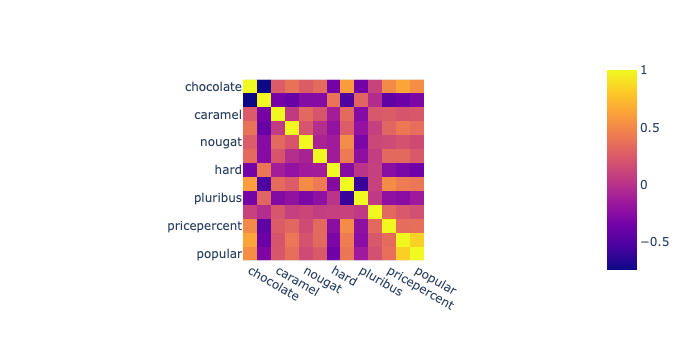

In [15]:
px.imshow(corr,x= (corr.columns),y= (corr.columns))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="dT?/6EKjd+)rT`THc*Qp">corr</variable></variables><block type="varDoMethod" id="7PkTI5@+A6#C}J7CTmyF" x="0" y="0"><mutation items="3"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">imshow</field><data>px:imshow</data><value name="ADD0"><block type="variables_get" id="DrBaD`rGEl+a=qpT5bB%"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id=":t|BUn$4=yp,Djax!iYN"><field name="CODE">x=</field><value name="INPUT"><block type="varGetProperty" id="CpA=c^{:N7|bZ;w+s7iF"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field><field name="MEMBER">columns</field><data>corr:columns</data></block></value></block></value><value name="ADD2"><block type="valueOutputCodeBlock" id="v7C?W!4JXSX2V]}+b}D,"><field name="CODE">y=</field><value name="INPUT"><block type="varGetProperty" id="@6I4JtsNe;G~mlkM.aG{"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field><field name="MEMBER">columns</field><data>corr:columns</data></block></value></block></value></block></xml>

**QUESTION:**

What color is strongly negative, what color is zero, and what color is strongly positive?

**ANSWER: (click here to edit)**

*Negative is dark purple, zero is pinkish, and positive is yellow.*
<hr>

**QUESTION:**

What's going on in the lower right corner?

**ANSWER: (click here to edit)**


*`popular` and `winpercent` are highly correlated, but that's because `popular` is based on `winpercent`. So we should ignore it.*
<hr>

### Histograms

For binary variables, histograms don't tell us anything that the descriptives don't already tell us.

However, there are two percent-type variables to plot, `sugarpercent` and `pricepercent`.

Plot a histogram of `sugarpercent`.

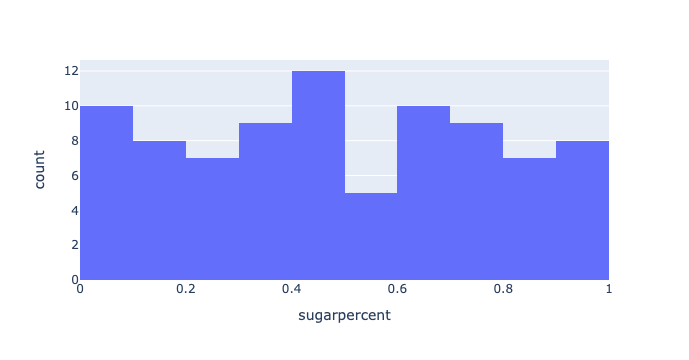

In [17]:
px.histogram(dataframe,x="sugarpercent")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="varDoMethod" id="M7Nr}Mv.DAk?=8Xv:VTh" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="variables_get" id="HERwNg=OfTm0rFH2lO!*"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="uJ?DS:J9fu7,X*mfzq]c"><field name="CODE">x="sugarpercent"</field></block></value></block></xml>

Plot a histogram of `pricepercent`.

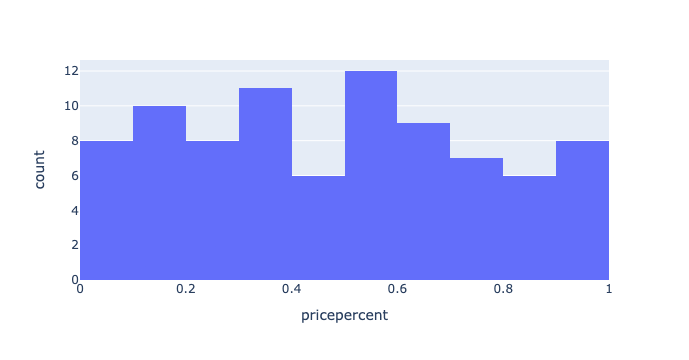

In [19]:
px.histogram(dataframe,x="pricepercent")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="varDoMethod" id="M7Nr}Mv.DAk?=8Xv:VTh" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="variables_get" id="HERwNg=OfTm0rFH2lO!*"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="uJ?DS:J9fu7,X*mfzq]c"><field name="CODE">x="pricepercent"</field></block></value></block></xml>

**QUESTION:**

What can you say about the distributions of `sugarpercent` and `pricepercent`?
Is there anything we should be concerned about?

**ANSWER: (click here to edit)**


*They are both pretty flat, or uniform. 
There is a notch in the middle of each, which may represent something, but it is not big enough to obviously mean anything.
Nothing about them seems concerning at all.*
<hr>

## Prepare train/test sets

You need to split the dataframe into training data and testing data, and also separate the predictors from the class labels.

Start by dropping the label, `popular`, and its counterpart, `winpercent`, to make a new dataframe called `X`.

In [21]:
X = dataframe.drop(columns=["popular","winpercent"])

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Eu6+HM0^Zfw6=$49Xgk7">X</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="variables_set" id="j12HEn?u}2$P-S)Ax6d(" x="-28" y="142"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field><value name="VALUE"><block type="varDoMethod" id="PMH^/O2y?rD(Y}r-N6eY"><mutation items="1"></mutation><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="8N-YF(7ms%)oox.~Z;b/"><field name="CODE">columns=["popular","winpercent"]</field></block></value></block></value></block><block type="variables_get" id="vPF[sSYN)o0~8jBU4udm" x="-25" y="296"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field></block></xml>

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
competitorname,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511
...,...,...,...,...,...,...,...,...,...,...,...
Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116
Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116
WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313


Save a dataframe with just `popular` in `Y`.

In [24]:
Y = dataframe[['popular']]

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="vEy06PN?Djk]8Ag?;UWi">Y</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="variables_set" id="_:J1([xryT4i+F7k{#[%" x="17" y="175"><field name="VAR" id="vEy06PN?Djk]8Ag?;UWi">Y</field><value name="VALUE"><block type="indexer" id="22hOF=T:mHvJrMybHkPs"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><value name="INDEX"><block type="lists_create_with" id="qT2G_{7q~*L;[5j:vtKq"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="=UVLwuCW$1d9ZJ]6HF_,"><field name="TEXT">popular</field></block></value></block></value></block></value></block><block type="variables_get" id="pog__n6Jf{VK_sNEB)B$" x="17" y="239"><field name="VAR" id="vEy06PN?Djk]8Ag?;UWi">Y</field></block></xml>

,popular
competitorname,
100 Grand,1
3 Musketeers,1
One dime,0
One quarter,0
Air Heads,1
...,...
Twizzlers,0
Warheads,0
WelchÕs Fruit Snacks,0


Import `sklean.model_selection` to split `X` and `Y` into train and test sets.

In [27]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable></variables><block type="importAs" id="sN1YO5FEzpHyxb31@j,Z" x="16" y="10"><field name="libraryName">sklearn.model_selection</field><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field></block></xml>

Now do the splits.

In [29]:
splits = model_selection.train_test_split(X,Y,test_size=0.2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable><variable id="Eu6+HM0^Zfw6=$49Xgk7">X</variable><variable id="vEy06PN?Djk]8Ag?;UWi">Y</variable></variables><block type="variables_set" id="oTGRJ#{R!U^we@Bl@pkT" x="-18" y="114"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field><value name="VALUE"><block type="varDoMethod" id="f?j@ker(a#hJv;Nh)IGX"><mutation items="3"></mutation><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="ADD0"><block type="variables_get" id=".mm}`*H4)i%Eq5z={e-$"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field></block></value><value name="ADD1"><block type="variables_get" id="I3dOV;CPBf^~E%BvgthZ"><field name="VAR" id="vEy06PN?Djk]8Ag?;UWi">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="@Hg?ib/!8fH$;f3pWJy2"><field name="CODE">test_size=0.2</field></block></value></block></value></block></xml>

## Logistic regression model

Import libraries for:

- Logistic regression
- Metrics
- Ravel

**NOTE: technically we don't need to scale anything and so don't need a pipeline.**

**QUESTION:**

Why don't we need to scale anything?

**ANSWER: (click here to edit)**

*All the variables are between 0 and 1, so they are basically on the same scale. In general, we don't need to scale for regression, though some people prefer to do that.*

<hr>

In [34]:
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="cGnMvhq5543q[r$:Og-x">linear_model</variable><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable></variables><block type="importAs" id="C,|uKYZ4CH*/,cD|4($8" x="135" y="303"><field name="libraryName">sklearn.linear_model</field><field name="VAR" id="cGnMvhq5543q[r$:Og-x">linear_model</field><next><block type="importAs" id="*G_SVgZ;}hIr,Hi1~$Z6"><field name="libraryName">sklearn.metrics</field><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><next><block type="importAs" id="rPZJ#sIeu`Zr!8,RiL!w"><field name="libraryName">numpy</field><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field></block></next></block></next></block></xml>

Create the logistic regression model.

In [35]:
lm = linear_model.LogisticRegression()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="}#R~_f(;Z:ZnAFRy.{;t">lm</variable><variable id="cGnMvhq5543q[r$:Og-x">linear_model</variable></variables><block type="variables_set" id="}81D/tZY#o}$E:M}:u4x" x="102" y="417"><field name="VAR" id="}#R~_f(;Z:ZnAFRy.{;t">lm</field><value name="VALUE"><block type="varCreateObject" id="ar7keIh-Yv)+b+#Edsp_"><mutation items="1"></mutation><field name="VAR" id="cGnMvhq5543q[r$:Og-x">linear_model</field><field name="MEMBER">LogisticRegression</field><data>linear_model:LogisticRegression</data></block></value></block></xml>

Train the logistic regression model using the splits.

In [37]:
lm.fit(splits[0],np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="}#R~_f(;Z:ZnAFRy.{;t">lm</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="Z)$q-zn.KTC{+^l-wH6u" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="}#R~_f(;Z:ZnAFRy.{;t">lm</field><field name="MEMBER">fit</field><data>lm:fit</data><value name="ADD0"><block type="lists_getIndex" id="C#,#1*rEm+]qEx?L1x[L"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="b_Sz{9#d7d=ystO|k?l_"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=":s{r1~S,,@.CSh#9`$R;"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="zYBlZ,!^P^%Ib5R@Ch.H"><mutation items="1"></mutation><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="lists_getIndex" id="^)UBt0jM;BnGmWeG7pw*"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="4Vo!*g]qQ=D}XtD2i39/"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="RysCD3.C27sBxztz(T}2"><field name="NUM">3</field></block></value></block></value></block></value></block></xml>

LogisticRegression()

Get predictions from the model using the test data.

In [50]:
predictions = lm.predict(splits[1])

predictions

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="}#R~_f(;Z:ZnAFRy.{;t">lm</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="variables_set" id="NHw$/HH988vNLbZgn)CM" x="-20" y="249"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field><value name="VALUE"><block type="varDoMethod" id="N}3ds6:i%0MtTA:(2im4"><mutation items="1"></mutation><field name="VAR" id="}#R~_f(;Z:ZnAFRy.{;t">lm</field><field name="MEMBER">predict</field><data>lm:predict</data><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block><block type="variables_get" id="Qn=~vbYi;jW-lme4qnx^" x="-25" y="349"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></xml>

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0])

## Assessing the model

Print the model accuracy.

In [53]:
print('Accuracy:' + str(metrics.accuracy_score(splits[3],predictions)))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="6KCf/4(JectOv*aO[L6d" x="9" y="197"><value name="TEXT"><block type="text_join" id="|l|?2Yb#{m=ys_V^)+v-"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="8MdDU0D^rCAqKltb#kaY"><field name="TEXT">Accuracy:</field></block></value><value name="ADD1"><block type="varDoMethod" id="p`ehX8lLN?zayQ1Ip=}V"><mutation items="2"></mutation><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:accuracy_score</data><value name="ADD0"><block type="lists_getIndex" id="bFo^*si#t6gt7l@W:;ux"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="9d/lD-+8|63uHF/H1dwi"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="o@Z:jn.60#6-_fkDivxs"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="GjWcPkckr7_}|j]O[Em+"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></value></block></xml>

Accuracy:0.7058823529411765


**QUESTION:**

How does this compare to the average value of `popular`? 
Is this a good accuracy?

**ANSWER: (click here to edit)**

*It's about .30 better than the average value, so it doesn't seem that bad.*

<hr>

Print precision, recall, and F1.

In [56]:
print(metrics.classification_report(splits[3],predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="w?Z]Mpw]G,uTA;S:C5Ef" x="20" y="207"><value name="TEXT"><block type="varDoMethod" id="p`ehX8lLN?zayQ1Ip=}V"><mutation items="2"></mutation><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="ADD0"><block type="lists_getIndex" id="bFo^*si#t6gt7l@W:;ux"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="9d/lD-+8|63uHF/H1dwi"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="o@Z:jn.60#6-_fkDivxs"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="GjWcPkckr7_}|j]O[Em+"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></xml>

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.75      0.67      0.71         9

    accuracy                           0.71        17
   macro avg       0.71      0.71      0.71        17
weighted avg       0.71      0.71      0.71        17



**QUESTION:**

How to the precision/recall/f1 compare for unpopular (0) and popular (1)?

**ANSWER: (click here to edit)**
*Popular (1) has lower precision but higher recall. The F1 for 1 is lower than 0.
Altogether, this tells us that the classifier is biased a bit more towards positives such that false positives lower precision but true positives raise recall.*


<hr>

Make an ROC plot. 

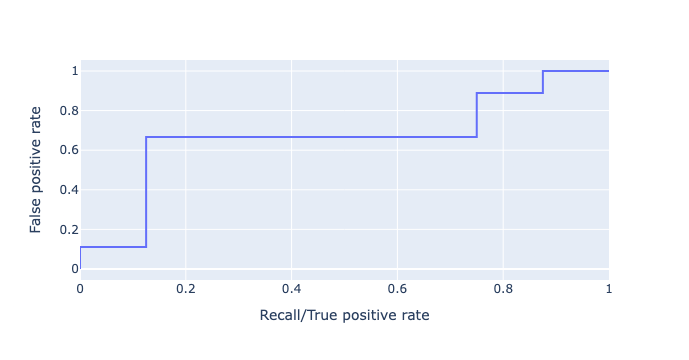

In [59]:
probs = lm.predict_proba(splits[1])
rocMetrics = metrics.roc_curve(splits[3],probs[:,1])
fig = px.line(x=rocMetrics[0],y=rocMetrics[1])

fig.update_xaxes(title_text="Recall/True positive rate")

fig.update_yaxes(title_text="False positive rate")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M}t8Cm4jpy8CZc{YnXy3">probs</variable><variable id="`MlX9tv$x9^+8hq@.?!W">fig</variable><variable id="}#R~_f(;Z:ZnAFRy.{;t">lm</variable><variable id=",,t`1|+/`aO88;3vt8ZU">rocMetrics</variable><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="variables_set" id="NHw$/HH988vNLbZgn)CM" x="94" y="230"><field name="VAR" id="M}t8Cm4jpy8CZc{YnXy3">probs</field><value name="VALUE"><block type="varDoMethod" id="N}3ds6:i%0MtTA:(2im4"><mutation items="1"></mutation><field name="VAR" id="}#R~_f(;Z:ZnAFRy.{;t">lm</field><field name="MEMBER">predict_proba</field><data>lm:predict_proba</data><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value><next><block type="variables_set" id="{Vr0U7#CSHcH3$f7Rl=#"><field name="VAR" id=",,t`1|+/`aO88;3vt8ZU">rocMetrics</field><value name="VALUE"><block type="varDoMethod" id="+pRingA59-cS:SaGR]^n"><mutation items="2"></mutation><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">roc_curve</field><data>metrics:roc_curve</data><value name="ADD0"><block type="lists_getIndex" id="Yv8tJGyfxa.|QTh-bL_Y"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="~QyKj9E#G;~nY7J3uc$0"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Rc{[92x!_;e1l+g1k^AB"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="{L(J(W$PwP~9H]LUK*@]"><field name="CODE">probs[:,1]</field></block></value></block></value><next><block type="variables_set" id="W7h$qZ#)mw;q4W)C**!w"><field name="VAR" id="`MlX9tv$x9^+8hq@.?!W">fig</field><value name="VALUE"><block type="varDoMethod" id="d*+SSBe!w+*bArZa1U(l"><mutation items="2"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">line</field><data>px:line</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="/Iun^UcDhcbGtutWOKyB"><field name="CODE">x=rocMetrics[0]</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="v]1Ja$g*6M?LF+Z:pH*F"><field name="CODE">y=rocMetrics[1]</field></block></value></block></value></block></next></block></next></block><block type="varDoMethod" id="v~NlMMq%DCb3{5}5G@?t" x="101" y="470"><mutation items="1"></mutation><field name="VAR" id="`MlX9tv$x9^+8hq@.?!W">fig</field><field name="MEMBER">update_xaxes</field><data>fig:update_xaxes</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="7C}@6O_#_O#ZulVd:PeB"><field name="CODE">title_text="Recall/True positive rate"</field></block></value></block><block type="varDoMethod" id="Y|Ib1~OM#=$;;ebWSDuL" x="129" y="525"><mutation items="1"></mutation><field name="VAR" id="`MlX9tv$x9^+8hq@.?!W">fig</field><field name="MEMBER">update_yaxes</field><data>fig:update_yaxes</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="-6j{q$_3dO.%,Ur65dAq"><field name="CODE">title_text="False positive rate"</field></block></value></block></xml>

**QUESTION:**

If we decreased the recall to .66, what would the false positives be? HINT: hover your mouse over the plot line at that value. 

**ANSWER: (click here to edit)**

0.09

<hr>

This last part is something we didn't really get to develop in the first session, so just run the code.

The odds ratio shows how much more likely a property makes the candy `popular`.
For many of these, the property is just presence/absence.
For example, the odds ratio of 3.06 on chocolate means that having chocolate as an ingredient makes the candy 3.06 times more popular than candy without chocolate.

<!-- TODO: move this into the main notebook; we will have space if we take out the data cleaning currently there -->

In [60]:
pd.DataFrame( {"variable":X.columns, "odds_ratio":np.exp(np.ravel(lm.coef_)) })

,variable,odds_ratio
0,chocolate,5.174200
1,fruity,1.583088
2,caramel,1.505923
3,peanutyalmondy,2.918490
4,nougat,0.875972
5,crispedricewafer,1.955234
6,hard,0.268682
7,bar,1.709630
8,pluribus,2.235689
9,sugarpercent,1.724896


**QUESTION:**

What are the top three *ingredients* that make something popular? Do any surprise you given the correlation matrix?

**ANSWER: (click here to edit)**

*`chocolate`, `peanutalmondy`, and `fruity` are the most positive for popularity. `fruity` is surprising because it was negatively correlated before, which may indicate a problem with the model. One way to test would be to have a model with `fruity` by itself as a predictor.*
<hr>

<!--  -->